In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
#tf.config.experimental.set_visible_devices([], 'GPU')

assert tf.test.is_gpu_available()
assert tf.test.is_built_with_cuda()

In [8]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


c:\users\erfwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of digit classes')

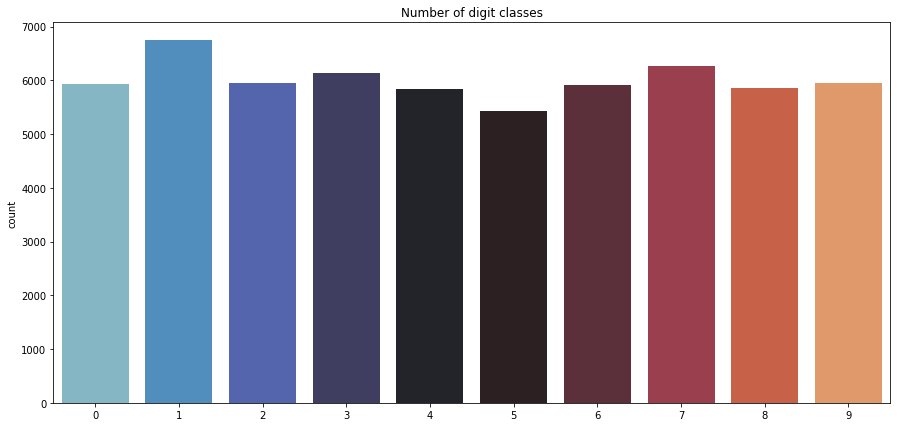

In [10]:
plt.figure(figsize = (15,7))
g = sns.countplot(y_train, palette = "icefire")
plt.title("Number of digit classes")

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train shape: ", x_train.shape)
print("test shape: ", x_test.shape)

x_train shape:  (60000, 28, 28)
test shape:  (10000, 28, 28)


In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


In [13]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [14]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x_train, y_train, test_size = 0.1, random_state = 1)

print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (54000, 28, 28, 1)
x_test shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_test shape (6000, 10)


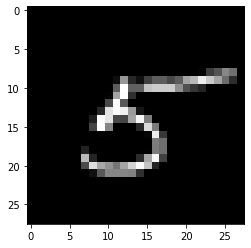

In [15]:
plt.imshow(x_train[2][:,:,0], cmap='gray')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
import itertools

In [17]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [18]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [19]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [20]:
epochs = 10
batch_size = 250

In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [22]:
history_data = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test, y_test), steps_per_epoch = x_train.shape[0] // batch_size)

c:\users\erfwi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
216/216 [==============================] - 11s 44ms/step - loss: 1.3801 - accuracy: 0.5294 - val_loss: 0.1831 - val_accuracy: 0.9473
Epoch 2/10
216/216 [==============================] - 9s 43ms/step - loss: 0.3772 - accuracy: 0.8809 - val_loss: 0.1126 - val_accuracy: 0.9668
Epoch 3/10
216/216 [==============================] - 9s 43ms/step - loss: 0.2699 - accuracy: 0.9173 - val_loss: 0.0934 - val_accuracy: 0.9728
Epoch 4/10
216/216 [==============================] - 9s 43ms/step - loss: 0.2282 - accuracy: 0.9314 - val_loss: 0.0794 - val_accuracy: 0.9762
Epoch 5/10
216/216 [==============================] - 9s 43ms/step - loss: 0.1996 - accuracy: 0.9386 - val_loss: 0.0733 - val_accuracy: 0.9778
Epoch 6/10
216/216 [==============================] - 9s 43ms/step - loss: 0.1815 - accuracy: 0.9442 - val_loss: 0.0712 - val_accuracy: 0.9783
Epoch 7/10
216/216 [==============================] - 9s 43ms/step - loss: 0.1746 - accuracy: 0.9462 - val_loss: 0.0637 - val_accuracy: 0.981

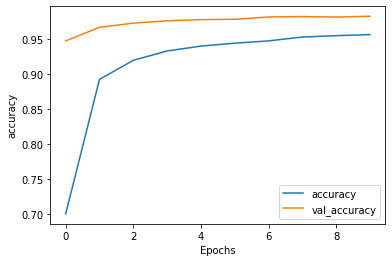

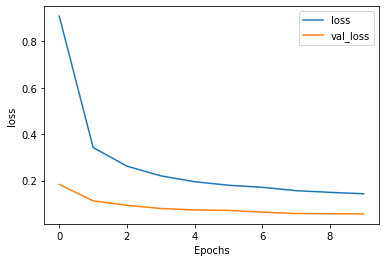

In [23]:
import matplotlib.pyplot as plt
def plot_data(history, string):
  plt.plot(history_data.history[string])
  plt.plot(history_data.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_data(history_data, "accuracy")
plot_data(history_data, "loss")

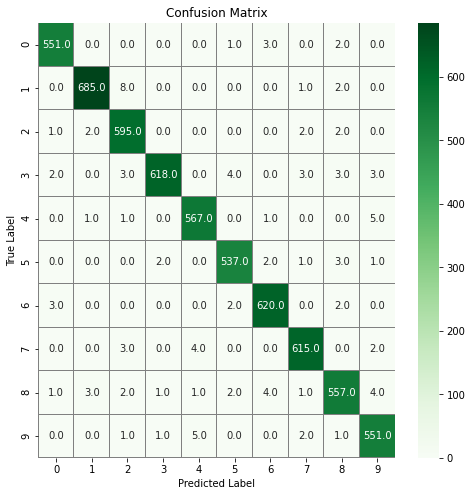

In [24]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()